Iteration 1: True A = 9.53, Final Estimate = 9.17, Final MMSE = 0.02
Iteration 2: True A = 10.30, Final Estimate = 10.42, Final MMSE = 0.02
Iteration 3: True A = 10.93, Final Estimate = 10.69, Final MMSE = 0.02
Iteration 4: True A = 9.63, Final Estimate = 9.39, Final MMSE = 0.02
Iteration 5: True A = 10.48, Final Estimate = 10.36, Final MMSE = 0.02
Iteration 6: True A = 9.76, Final Estimate = 9.72, Final MMSE = 0.02
Iteration 7: True A = 9.95, Final Estimate = 9.88, Final MMSE = 0.02
Iteration 8: True A = 10.47, Final Estimate = 10.13, Final MMSE = 0.02
Iteration 9: True A = 11.13, Final Estimate = 11.11, Final MMSE = 0.02
Iteration 10: True A = 9.99, Final Estimate = 9.98, Final MMSE = 0.02


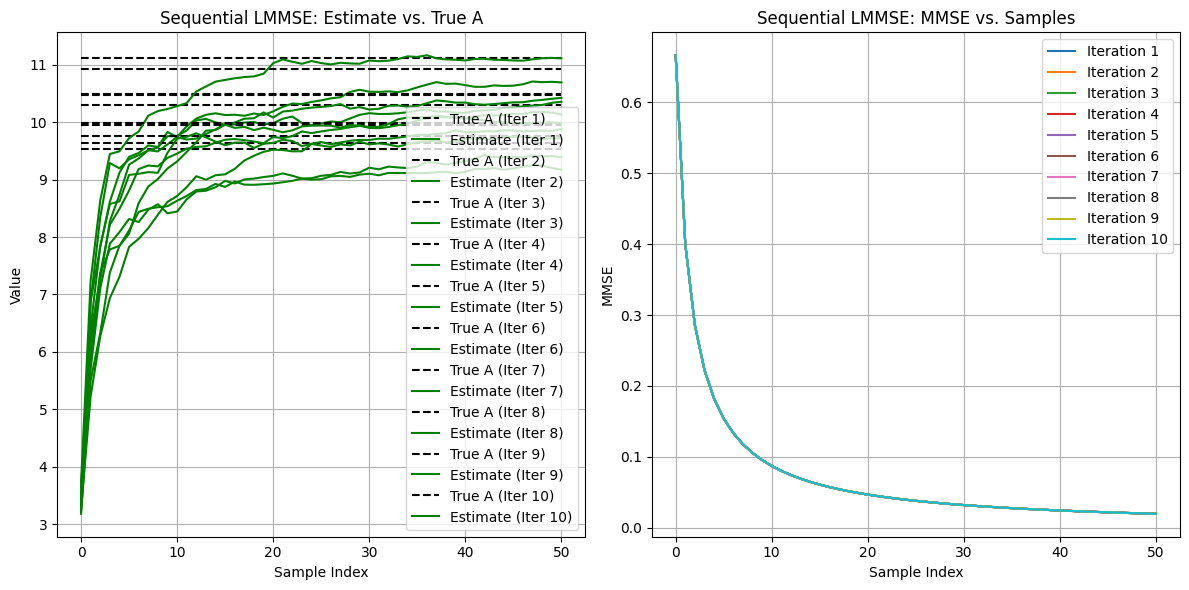

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_samples = 50  # Number of samples per iteration
num_iterations = 10  # Number of iterations (different realizations of A)
mu_A = 10.0  # Mean of the parameter A
sigma_A = 1.0  # Variance of the parameter A
sigma_w = 1.0  # Variance of the noise

# Storage for results
all_estimates = []  # Store estimates for each iteration
all_true_values = []  # Store true values of A for each iteration
all_mmse_values = []  # Store MMSE values for each iteration

# Outer loop: Vary A over multiple iterations
for iteration in range(num_iterations):
    # Initialize for each iteration
    a_true = np.random.normal(mu_A, sigma_A)  # True value of A (random)
    
    a_est = sigma_A**2/(sigma_A**2+sigma_w**2/2)*(1/2)*a_true  # Initial estimate of A (prior mean)

    P = sigma_A**2/(sigma_A**2+sigma_w**2/2) # Initial MMSE (prior variance)

    estimates = [a_est]  # Store estimates for this iteration
    true_values = [a_true]  # Store true values of A for this iteration
    mmse_values = [P]  # Store MMSE values for this iteration

    # Sequential LMMSE Estimation
    for n in range(1, num_samples + 1):
        # Generate new observation
        w_n = np.random.normal(0, sigma_w)  # Noise sample
        x_n = a_true + w_n  # Observation

        # Kalman gain calculation
        K = P / (P + sigma_w**2)

        # Update estimate
        a_est = a_est + K * (x_n - a_est)

        # Update MMSE
        P = (1 - K) * P

        # Store values for this iteration
        estimates.append(a_est)
        true_values.append(a_true)
        mmse_values.append(P)

    # Store results for this iteration
    all_estimates.append(estimates)
    all_true_values.append(true_values)
    all_mmse_values.append(mmse_values)

    # Print results for this iteration
    print(f"Iteration {iteration + 1}: True A = {a_true:.2f}, Final Estimate = {a_est:.2f}, Final MMSE = {P:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Estimate vs. True Value sequentially
plt.subplot(1, 2, 1)
for i in range(num_iterations):
    plt.plot(range(num_samples + 1), all_true_values[i], label=f"True A (Iter {i + 1})", linestyle='--', color='k')
    plt.plot(range(num_samples + 1), all_estimates[i], label=f"Estimate (Iter {i + 1})", color='g')
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Sequential LMMSE: Estimate vs. True A")
plt.legend()
plt.grid()

# Plot MMSE over Samples for all iterations
plt.subplot(1, 2, 2)
for i in range(num_iterations):
    plt.plot(range(num_samples + 1), all_mmse_values[i], label=f"Iteration {i + 1}")
plt.xlabel("Sample Index")
plt.ylabel("MMSE")
plt.title("Sequential LMMSE: MMSE vs. Samples")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()